Import Libraries

In [8]:
import pandas as pd
import os

In [26]:

# Read the CSV file
df = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

# Correct the method name to os.listdir
files = [file for file in os.listdir('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()
# Print each file in the directory
for file in files:
    df = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

Read in Updated DataFrame

In [29]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning

In [37]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Remove 'Or'

In [50]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Convert columns to the correct data type

In [60]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

# Convert 'Price Each' to numeric (float) type
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Verify the result
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [62]:
# Drop rows with NaN values in 'Quantity Ordered' or 'Price Each'
all_data.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

# Verify the result
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Data Augmentation with new columns, Add Month Column

In [64]:
# Filter out rows where 'Order Date' is invalid (e.g., contains 'Or')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

# Extract the month from the 'Order Date' column
all_data['Month'] = all_data['Order Date'].str[0:2]

# Convert the 'Month' column to integer type
all_data['Month'] = all_data['Month'].astype(int)

# Verify the result
print(all_data.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  


Adding Sales column

In [68]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Add City Column

In [109]:
def get_city(address):
    try:
        return address.split(',')[1].strip()
    except IndexError:
        return None

def get_state(address):
    try:
        return address.split(',')[2].strip().split(' ')[0]
    except IndexError:
        return None

# Apply the functions to the 'Purchase Address' column
all_data['City_State'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x) if get_city(x) and get_state(x) else None)

# Show the first few rows of the updated dataframe
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,City_State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,Los Angeles CA


## Best Month for Sale and how much sale company earned

In [82]:
results = all_data.groupby('Month').sum()


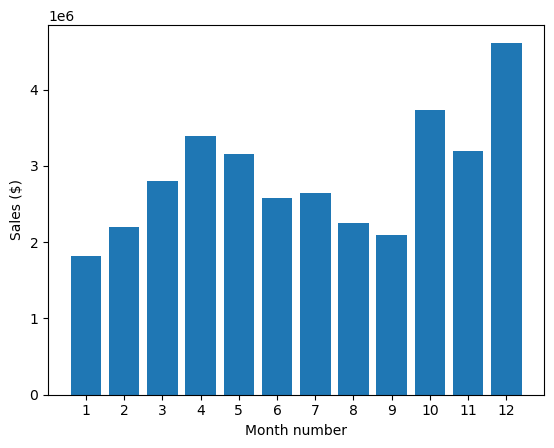

In [84]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])

plt.xticks(months)
plt.ylabel('Sales ($)')
plt.xlabel('Month number')
plt.show()

## Which city have highest earning

In [111]:
results = all_data.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City_State
City,,,,,,,,,,
Atlanta,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58,Atlanta Atlanta Atlanta Atlanta Atlanta Atlan...,Atlanta GAAtlanta GAAtlanta GAAtlanta GAAtlant...
Austin,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75,Austin Austin Austin Austin Austin Austin Aus...,Austin TXAustin TXAustin TXAustin TXAustin TXA...
Boston,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01,Boston Boston Boston Boston Boston Boston Bos...,Boston MABoston MABoston MABoston MABoston MAB...
Dallas,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40,Dallas Dallas Dallas Dallas Dallas Dallas Dal...,Dallas TXDallas TXDallas TXDallas TXDallas TXD...
Los Angeles,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80,Los Angeles Los Angeles Los Angeles Los Angel...,Los Angeles CALos Angeles CALos Angeles CALos ...
New York City,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43,New York City New York City New York City New...,New York City NYNew York City NYNew York City ...
Portland,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,14053,2307747.47,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",87765,2320490.61,Portland Portland Portland Portland Portland ...,Portland ORPortland ORPortland ORPortland ORPo...
San Francisco,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91,San Francisco San Francisco San Francisco San...,San Francisco CASan Francisco CASan Francisco ...
Seattle,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.01,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",104941,2747755.48,Seattle Seattle Seattle Seattle Seattle Seatt...,Seattle WASeattle WASeattle WASeattle WASeattl...


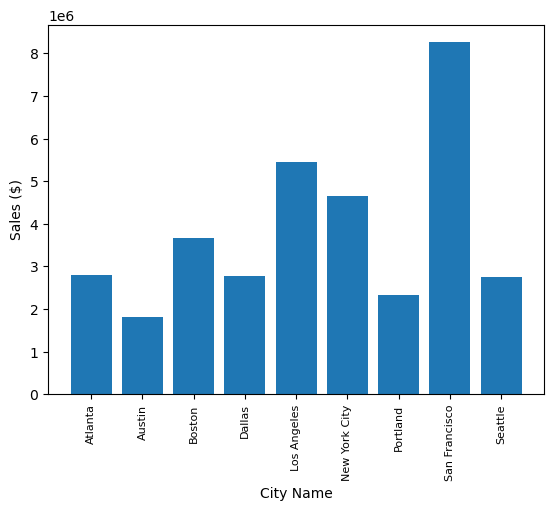

In [117]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales ($)')
plt.xlabel('City Name')
plt.show()

## Best time to show advertisments to customers

In [127]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%Y', errors='coerce')

# Show the first few rows of the updated dataframe
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,City_State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,Los Angeles CA


In [131]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,City_State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles,Los Angeles CA,9,27


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,City_State,Minute
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


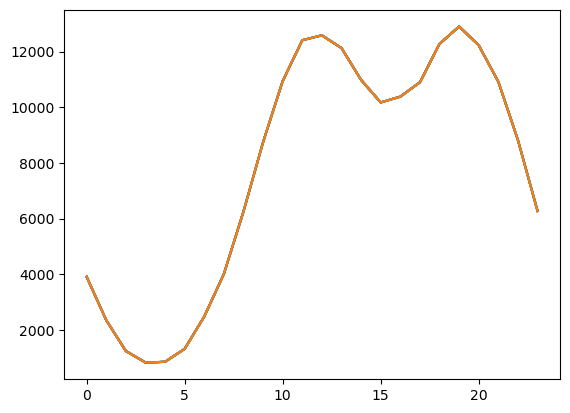

In [137]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

all_data.groupby(['Hour']).count()

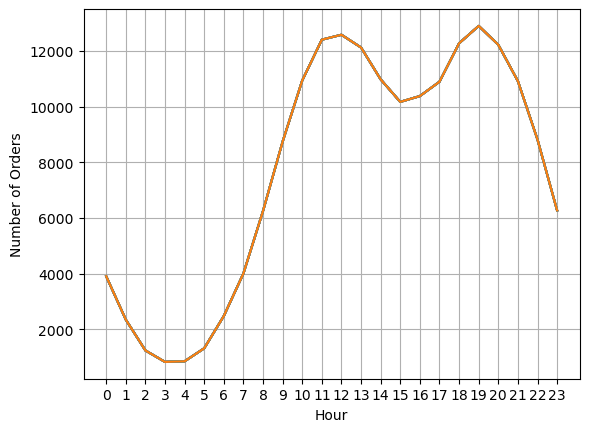

In [141]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

## Most sold pair products

In [153]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Pranjali\AppData\Local\Temp\ipykernel_12164\609569313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [159]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

print(count)

for key, value in count.most_common(10):
    print(key, value)



    

Counter({('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62, ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47, ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35, ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33, ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27, ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24, ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16, ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4, ('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 3, ('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'): 3, ('iPhone', 'Lightning Charging Cable', 'AA Batteries (4

## What product sold most and why

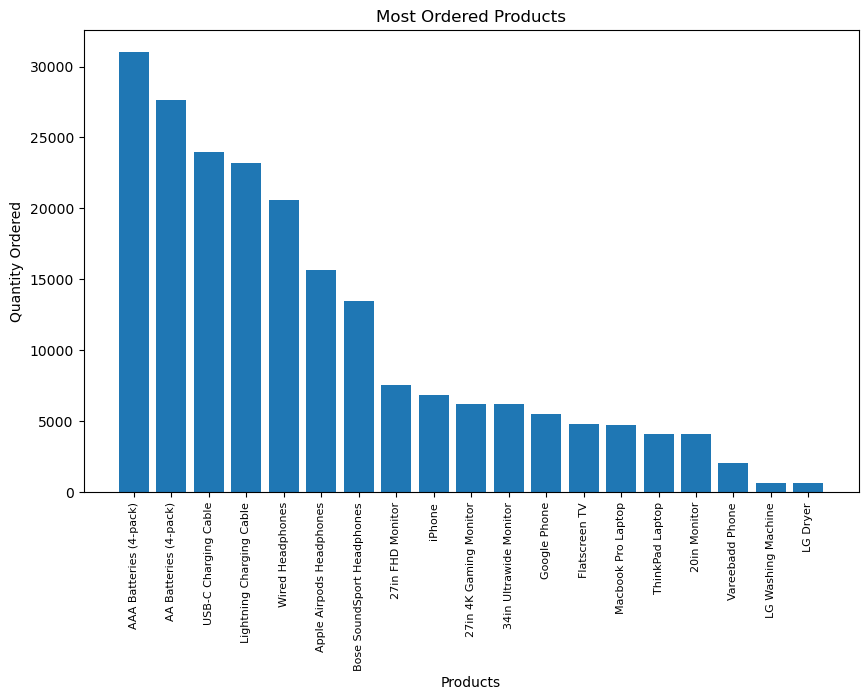

In [172]:


# Group by product and sum the quantity ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Sort the products by quantity ordered
quantity_ordered_sorted = quantity_ordered.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(quantity_ordered_sorted.index, quantity_ordered_sorted.values)
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Most Ordered Products')
plt.show()



C:\Users\Pranjali\AppData\Local\Temp\ipykernel_12164\804484306.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


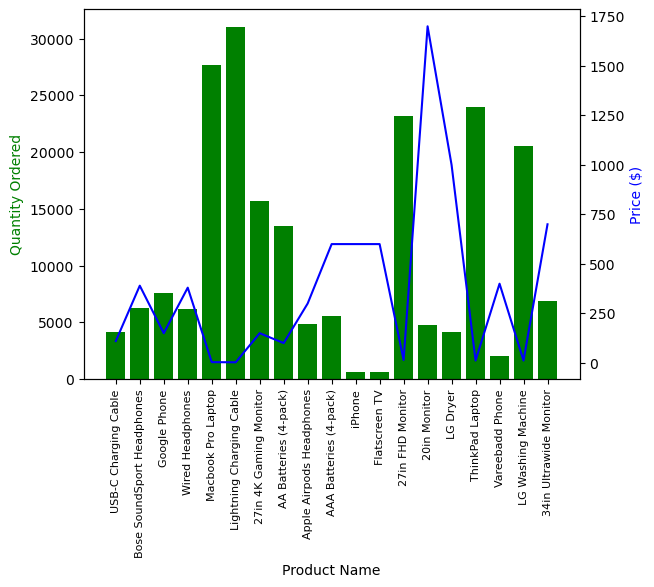

In [184]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data.dropna(subset=['Price Each'], inplace=True)

# Calculate average price for each product
prices = all_data.groupby('Product')['Price Each'].mean()

# Assuming you have the quantities and product names
products = all_data['Product'].unique()  # or use a list of products
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()

fig, ax1 = plt.subplots()

# Twin the y-axis
ax2 = ax1.twinx()

# Plot bar chart for quantity ordered
ax1.bar(products, quantity_ordered, color='g')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')

# Plot line chart for prices
ax2.plot(products, prices, 'b-')
ax2.set_ylabel('Price ($)', color='b')

# Fix xticklabels
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()